In [1]:
import sys
sys.path.append('..')

In [2]:
from src.models.pipeline import pipeline
import glob
import json
import os
import pandas as pd
import ast
from datetime import datetime

In [3]:
groundbase_dir = '../data/raw/groundbase'
transcripts_dir = os.path.join(groundbase_dir,'transcripts')
topic_dataset_path = os.path.join(groundbase_dir,'dataset.csv')
transcript_filespath = glob.glob(groundbase_dir + '/transcripts/*.json')

In [4]:
'''Read the transcript'''
transcripts_jsons = {}
for fl in transcript_filespath:
    with open(fl,encoding="utf8") as f:
        transcript =ast.literal_eval(f.read()) #json.load(f)
        vid = fl.split('\\')[-1].split('.')[0]
        #print(vid)
        transcripts_jsons[vid] = transcript
#print(transcripts_jsons)

In [5]:
'''Read the videos metadata to perform on them the segmentation'''
df_videos = pd.read_csv(topic_dataset_path)

In [6]:
''' Transfer topic shifts time to seconds units instead HH:MM:SS'''

def topic_shifts_seconds(topic_shifts):
    tp_shift_sec=[]
    for tp in topic_shifts:
        intervals = tp.split(':')
        seconds = int(intervals[2])
        minutes = int(intervals[1]) * 60
        hours = int(intervals[0]) * 60 *60
        tp_shift_sec.append(seconds + minutes + hours)
    return tp_shift_sec


for video_id in transcripts_jsons.keys():    
    df_videos.at[df_videos['video id'] == video_id,'topic shifts(ends)'] =\
    topic_shifts_seconds(\
                         df_videos[df_videos['video id'] == \
                                   video_id]['topic shifts(ends)'])


In [7]:
#df_videos

In [8]:
'''
    Preparing the experiment parameters csv
'''

# if you want to use existing file - specify it. else, replace it with None
experiment_date = '07-05-2020 17-28-21.csv'
exp_file = '../models/{}'.format(experiment_date)
#exp_file = None

if exp_file is None:
    mycolumns = ['video_id','window_size','step_size','vector_method',\
                 'clustering_params','vectorizing_params',\
                 'similarity_method','is_min_thresh',\
                'sim_thresh','sim_filter','accurrcy_shift']
    df_exp = pd.DataFrame(columns=mycolumns)
    df_exp['video_id'] =transcripts_jsons.keys()
    df_exp['n_clusters'] = [len(df_videos.loc[df_videos['video id'] == vd,\
                                           'topic shifts(ends)'].values.tolist()) - 1\
                            for vd in transcripts_jsons.keys()]
    date_now = datetime.now().strftime("%d-%m-%Y %H-%M-%S")
    experiment_date = '{}.csv'.format(date_now)
    exp_file = "../models/{}".format(experiment_date)
    #print(experiment_date)
    df_experiment = df_exp.to_csv(exp_file)

# Now go to the latest experiment file and add you parameters. Afterwords you can continue with running the notebook.

# To run the experiment, click from here run below all

In [48]:
df_exp = pd.read_csv(exp_file,index_col=0)
df_results = pd.DataFrame()

'''Last cleaning'''
df_exp = df_exp.replace({pd.np.nan: None})
df_videos = df_videos.replace({pd.np.nan:None})

In [49]:
df_exp

,video_id,window_size,step_size,vector_method,clustering_params,vectorizing_params,similarity_method,is_min_thresh,sim_thresh,sim_filter,accurrcy_shift,n_clusters
0,MkiUBJcgdUY,40,20,doc2vec,"{ 'algorithm':'spectral_clustering','n_cluster...",None,cosine,True,0.4,None,15,18
1,MkiUBJcgdUY,100,20,doc2vec,"{ 'algorithm':'spectral_clustering','n_cluster...",None,cosine,True,0.4,None,15,18
2,MkiUBJcgdUY,50,10,doc2vec,"{ 'algorithm':'spectral_clustering','n_cluster...",None,cosine,True,0.4,None,15,18
3,MkiUBJcgdUY,20,20,doc2vec,"{ 'algorithm':'spectral_clustering','n_cluster...",None,cosine,True,0.4,None,15,18
4,MkiUBJcgdUY,40,40,doc2vec,"{ 'algorithm':'spectral_clustering','n_cluster...",None,cosine,True,0.4,None,15,18


In [56]:
'''Configure result directory'''

# random a number to not override existing files
import random
extention = random.randint(0,1000)

result_name = experiment_date.split('.')[0] + "_" + str(extention)
results_path = '../data/processed/{}'.format(result_name)
os.mkdir(results_path)
results_file_path = os.path.join(results_path,'data.csv')

running the 0 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                          40
step_size                                                            20
vector_method                                                   doc2vec
clustering_params     { 'algorithm':'spectral_clustering','n_cluster...
vectorizing_params                                                 None
similarity_method                                                cosine
is_min_thresh                                                      True
sim_thresh                                                          0.4
sim_filter                                                         None
accurrcy_shift                                                       15
n_clusters                                                           18
Name: 0, dtype: object
                  0
count  20164.000000
mean       0.391681
std        0.238304
min     

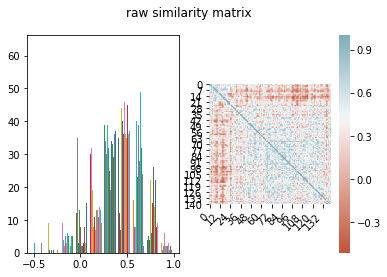

                  0
count  20164.000000
mean       0.301442
std        0.299916
min        0.000000
25%        0.000000
50%        0.416476
75%        0.564237
max        1.000000


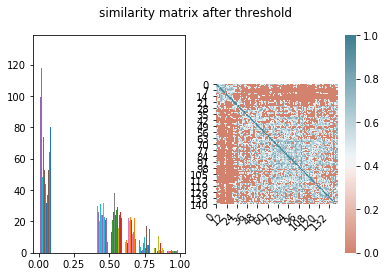

label 6 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 1 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                         100
step_size                                                            20
vector_method                                                   doc2vec
clustering_params     { 'algorithm':'spectral_clustering','n_cluster...
vectorizing_params                                                 None
similarity_method                                                cosine
is_min_thresh                                                      True
sim_thresh                                                          0.4
sim_filter                                                         None
accurrcy_shift                                                       15
n_clusters                                                           18
Name: 1, dtype: obje

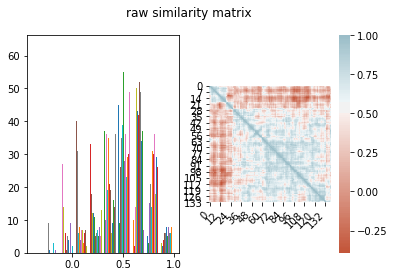

                  0
count  19321.000000
mean       0.443367
std        0.314272
min        0.000000
25%        0.000000
50%        0.541266
75%        0.690435
max        1.000000


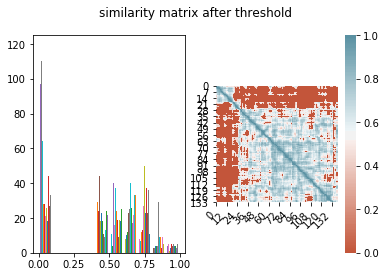

label 14 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 2 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                          50
step_size                                                            10
vector_method                                                   doc2vec
clustering_params     { 'algorithm':'spectral_clustering','n_cluster...
vectorizing_params                                                 None
similarity_method                                                cosine
is_min_thresh                                                      True
sim_thresh                                                          0.4
sim_filter                                                         None
accurrcy_shift                                                       15
n_clusters                                                           18
Name: 2, dtype: obj

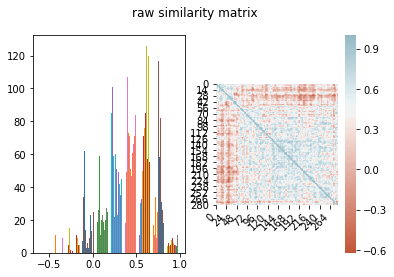

                  0
count  79524.000000
mean       0.335322
std        0.305636
min        0.000000
25%        0.000000
50%        0.444313
75%        0.595628
max        1.000000


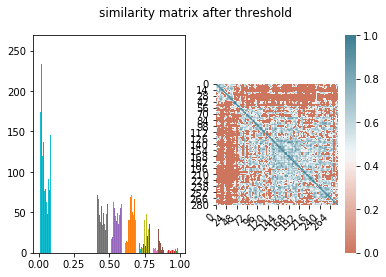

label 0 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 3 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                          20
step_size                                                            20
vector_method                                                   doc2vec
clustering_params     { 'algorithm':'spectral_clustering','n_cluster...
vectorizing_params                                                 None
similarity_method                                                cosine
is_min_thresh                                                      True
sim_thresh                                                          0.4
sim_filter                                                         None
accurrcy_shift                                                       15
n_clusters                                                           18
Name: 3, dtype: obje

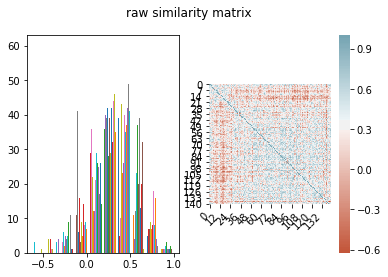

                  0
count  20449.000000
mean       0.219679
std        0.280776
min        0.000000
25%        0.000000
50%        0.000000
75%        0.495920
max        1.000000


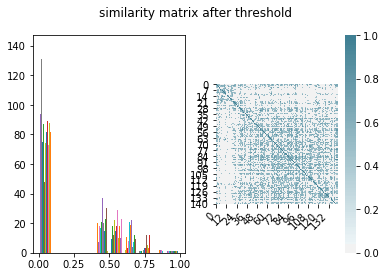

label 1 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 4 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                          40
step_size                                                            40
vector_method                                                   doc2vec
clustering_params     { 'algorithm':'spectral_clustering','n_cluster...
vectorizing_params                                                 None
similarity_method                                                cosine
is_min_thresh                                                      True
sim_thresh                                                          0.4
sim_filter                                                         None
accurrcy_shift                                                       15
n_clusters                                                           18
Name: 4, dtype: obje

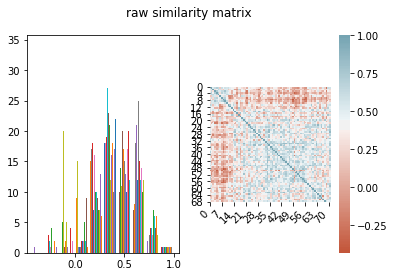

                 0
count  5184.000000
mean      0.297971
std       0.301558
min       0.000000
25%       0.000000
50%       0.410123
75%       0.559075
max       1.000000


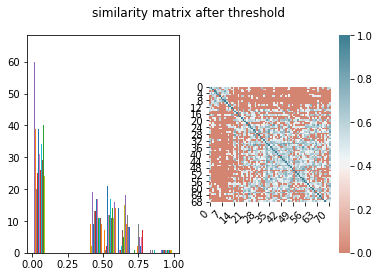

label 11 has done already cannot evaluate unsequentional segmentation, try other parameters


In [57]:
'''running the pipeline for each of the '''

for index,exp in df_exp.iterrows():
    #ground_base = df_videos.loc[df_videos['video id'] == exp['video_id'],'topic shifts(ends)'].values.tolist()[:-1]
    vid = exp['video_id']
    video_metadata = df_videos.loc[df_videos['video id'] == vid]
    # getting the topic shifts except the end of the video which is clearly at the length time 
    ground_base = video_metadata['topic shifts(ends)'].values.tolist()[:-1]
    video_len = video_metadata['length'].values.tolist()[0]
    curr_transcripts = transcripts_jsons[vid]    
    
    sim_filter = exp['sim_filter']
    if sim_filter is not None:
        sim_filter = ast.literal_eval(sim_filter)
    
    vectorizing_params = exp['vectorizing_params']
    if vectorizing_params is not None:
        vectorizing_params = ast.literal_eval(vectorizing_params)
    
    clustering_params = exp['clustering_params']
    if clustering_params is not None:
        clustering_params = ast.literal_eval(clustering_params)
    
    figure_path = os.path.join(results_path,str(index))
    os.mkdir(figure_path)
    
    print("running the %s experiment" %  (index))
    print(exp)
    
    
    df_results = pipeline.run(df_results,ground_base,vid,video_len,curr_transcripts,\
                              figure_path = figure_path,\
                              clustering_params = clustering_params,vectorizing_params=vectorizing_params,\
                             window_size = exp['window_size'], step_size = exp['step_size'],\
                             vector_method=exp['vector_method'],similarity_method= exp['similarity_method'],\
                             is_min_thresh=exp['is_min_thresh'],sim_thresh=exp['sim_thresh'],\
                             sim_filter=sim_filter,accurrcy_shift=exp['accurrcy_shift'])

In [45]:
headers = ['VIDEO','METHOD','ISFAILED',\
            'PRECISION','RECALL',\
            'TP','FP','FN','BLOCKSIZE','STEPSIZE',\
            'NUMOFCLUSTERSFORSC','NUMTOPICS','THERSHOLD',\
            'VECTORIZATIONPARAMS','CLUSTERINGPARAMS',\
            'FILTER','VIDEOLENGTH','ACCURECYSECONDS','FAILUREMESSAGE']

df_results[headers]

,VIDEO,METHOD,ISFAILED,PRECISION,RECALL,TP,FP,FN,BLOCKSIZE,STEPSIZE,NUMOFCLUSTERSFORSC,NUMTOPICS,THERSHOLD,VECTORIZATIONPARAMS,CLUSTERINGPARAMS,FILTER,VIDEOLENGTH,ACCURECYSECONDS,FAILUREMESSAGE
0,MkiUBJcgdUY,chunking_doc2vec_cosine_threshold_spectral_clu...,1.0,0.0,0.0,0.0,0.0,0.0,40.0,20.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 9 has done already cannot evaluate unseq...
1,MkiUBJcgdUY,chunking_doc2vec_cosine_threshold_spectral_clu...,1.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 5 has done already cannot evaluate unseq...
2,MkiUBJcgdUY,chunking_doc2vec_cosine_threshold_spectral_clu...,1.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 13 has done already cannot evaluate unse...
3,MkiUBJcgdUY,slidingwindow_doc2vec_cosine_threshold_spectra...,1.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 7 has done already cannot evaluate unseq...
4,MkiUBJcgdUY,slidingwindow_doc2vec_cosine_threshold_spectra...,1.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 2 has done already cannot evaluate unseq...
5,MkiUBJcgdUY,chunking_doc2vec_cosine_threshold_spectral_clu...,1.0,0.0,0.0,0.0,0.0,0.0,40.0,20.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 14 has done already cannot evaluate unse...
6,MkiUBJcgdUY,chunking_doc2vec_cosine_threshold_spectral_clu...,1.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 11 has done already cannot evaluate unse...
7,MkiUBJcgdUY,chunking_doc2vec_cosine_threshold_spectral_clu...,1.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 17 has done already cannot evaluate unse...
8,MkiUBJcgdUY,slidingwindow_doc2vec_cosine_threshold_spectra...,1.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 6 has done already cannot evaluate unseq...
9,MkiUBJcgdUY,slidingwindow_doc2vec_cosine_threshold_spectra...,1.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0,18.0,18.0,0.4,None,"{'algorithm': 'spectral_clustering', 'n_cluste...",None,01:05:06,15.0,label 4 has done already cannot evaluate unseq...


In [40]:
'''Save the results into file'''
df_results.to_csv(results_file_path,columns=headers)